In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import requests library
import requests
# Import API key
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add Lat-Long tuples to a list
coordinates = list(lat_lngs)

In [4]:
# Use citipy module to determine city based on lat/long
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | torbay
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | tuatapere
Processing Record 5 of Set 1 | evensk
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | olga
Processing Record 8 of Set 1 | la encarnacion
Processing Record 9 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 1 | romny
Processing Record 11 of Set 1 | carutapera
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | nanzhang
Processing Record 14 of Set 1 | godfrey
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | vila velha
Processing Record 17 of Set 1 | barcelona
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | saskylakh
Processing Record 20 of Set 1 | banda aceh
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | rassv

Processing Record 43 of Set 4 | ponta do sol
Processing Record 44 of Set 4 | at-bashi
Processing Record 45 of Set 4 | jarvenpaa
Processing Record 46 of Set 4 | adjumani
Processing Record 47 of Set 4 | mayumba
Processing Record 48 of Set 4 | yarmouth
Processing Record 49 of Set 4 | bathsheba
Processing Record 50 of Set 4 | shunyi
Processing Record 1 of Set 5 | norman wells
Processing Record 2 of Set 5 | jalu
Processing Record 3 of Set 5 | yerofey pavlovich
Processing Record 4 of Set 5 | yerbogachen
Processing Record 5 of Set 5 | goure
Processing Record 6 of Set 5 | angra
City not found. Skipping...
Processing Record 7 of Set 5 | airai
Processing Record 8 of Set 5 | nabire
Processing Record 9 of Set 5 | vardo
Processing Record 10 of Set 5 | victoria
Processing Record 11 of Set 5 | tiksi
Processing Record 12 of Set 5 | gigmoto
Processing Record 13 of Set 5 | hithadhoo
Processing Record 14 of Set 5 | crestview
Processing Record 15 of Set 5 | kuah
Processing Record 16 of Set 5 | ancud
Proce

Processing Record 32 of Set 8 | rock sound
Processing Record 33 of Set 8 | mackenzie
Processing Record 34 of Set 8 | provideniya
Processing Record 35 of Set 8 | celestun
Processing Record 36 of Set 8 | starovelichkovskaya
Processing Record 37 of Set 8 | ilulissat
Processing Record 38 of Set 8 | gamba
Processing Record 39 of Set 8 | kawalu
Processing Record 40 of Set 8 | faanui
Processing Record 41 of Set 8 | santa luzia
Processing Record 42 of Set 8 | ballina
Processing Record 43 of Set 8 | murgab
Processing Record 44 of Set 8 | turukhansk
Processing Record 45 of Set 8 | itarema
Processing Record 46 of Set 8 | dondo
Processing Record 47 of Set 8 | rungata
City not found. Skipping...
Processing Record 48 of Set 8 | tingi
Processing Record 49 of Set 8 | barguzin
Processing Record 50 of Set 8 | elko
Processing Record 1 of Set 9 | tezu
Processing Record 2 of Set 9 | mount isa
Processing Record 3 of Set 9 | maumere
Processing Record 4 of Set 9 | yabelo
Processing Record 5 of Set 9 | wenling

Processing Record 19 of Set 12 | penzance
Processing Record 20 of Set 12 | nouadhibou
Processing Record 21 of Set 12 | mahajanga
Processing Record 22 of Set 12 | goderich
Processing Record 23 of Set 12 | sakakah
Processing Record 24 of Set 12 | tomakomai
Processing Record 25 of Set 12 | san patricio
Processing Record 26 of Set 12 | martapura
Processing Record 27 of Set 12 | zeya
Processing Record 28 of Set 12 | eskisehir
Processing Record 29 of Set 12 | wewak
Processing Record 30 of Set 12 | sheridan
Processing Record 31 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 32 of Set 12 | morant bay
Processing Record 33 of Set 12 | jujuy
City not found. Skipping...
Processing Record 34 of Set 12 | mercedes
Processing Record 35 of Set 12 | samarai
Processing Record 36 of Set 12 | suhbaatar
Processing Record 37 of Set 12 | hamilton
Processing Record 38 of Set 12 | coos bay
Processing Record 39 of Set 12 | vilhena
Processing Record 40 of Set 12 | waitara
Processing Record

In [9]:
len(city_data)

566

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,44.28,70,97,4.59,GL,2021-08-03 16:17:38
1,Torbay,47.6666,-52.7314,69.89,63,10,20.58,CA,2021-08-03 16:17:38
2,Georgetown,5.4112,100.3354,84.88,79,20,2.30,MY,2021-08-03 16:17:38
3,Tuatapere,-46.1333,167.6833,34.83,91,24,4.18,NZ,2021-08-03 16:17:39
4,Evensk,61.9500,159.2333,44.35,79,100,7.87,RU,2021-08-03 16:17:39
5,Atuona,-9.8000,-139.0333,77.40,72,85,22.48,PF,2021-08-03 16:15:19
6,Olga,43.7444,135.2892,66.69,98,100,1.97,RU,2021-08-03 16:17:39
7,La Encarnacion,14.6667,-89.0833,77.72,65,99,3.13,HN,2021-08-03 16:17:40
8,Romny,50.7510,33.4747,73.42,51,89,4.83,UA,2021-08-03 16:17:40
9,Carutapera,-1.1950,-46.0200,88.95,50,74,1.36,BR,2021-08-03 16:17:40


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2021-08-03 16:17:38,77.4840,-69.3632,44.28,70,97,4.59
1,Torbay,CA,2021-08-03 16:17:38,47.6666,-52.7314,69.89,63,10,20.58
2,Georgetown,MY,2021-08-03 16:17:38,5.4112,100.3354,84.88,79,20,2.30
3,Tuatapere,NZ,2021-08-03 16:17:39,-46.1333,167.6833,34.83,91,24,4.18
4,Evensk,RU,2021-08-03 16:17:39,61.9500,159.2333,44.35,79,100,7.87


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

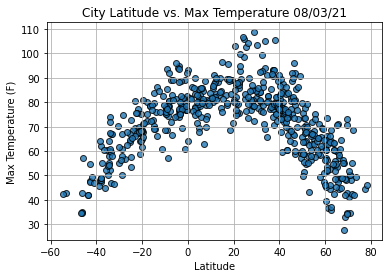

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

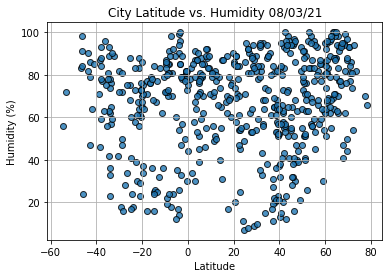

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

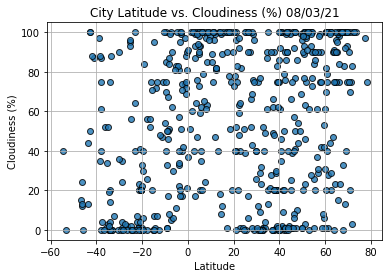

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

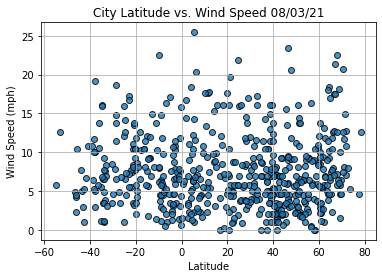

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [19]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2021-08-03 16:17:38,77.4840,-69.3632,44.28,70,97,4.59
1,Torbay,CA,2021-08-03 16:17:38,47.6666,-52.7314,69.89,63,10,20.58
2,Georgetown,MY,2021-08-03 16:17:38,5.4112,100.3354,84.88,79,20,2.30
4,Evensk,RU,2021-08-03 16:17:39,61.9500,159.2333,44.35,79,100,7.87
6,Olga,RU,2021-08-03 16:17:39,43.7444,135.2892,66.69,98,100,1.97


In [21]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

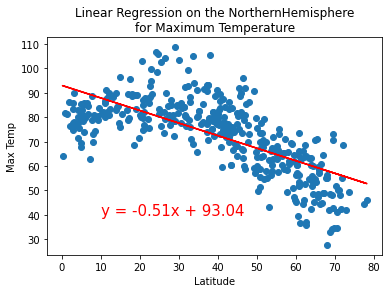

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern' 
                       'Hemisphere\nfor Maximum Temperature', 'Max Temp',(10,40))


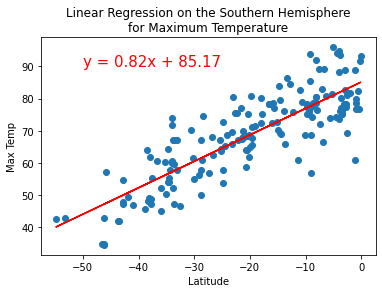

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern '
                       'Hemisphere\nfor Maximum Temperature', 'Max Temp',(-50,90))

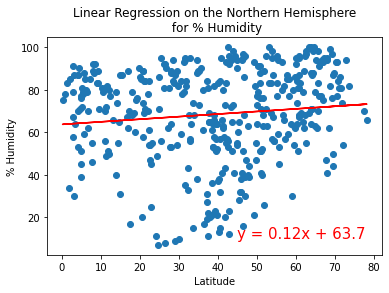

In [41]:
# Linear regression for Humidity on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern '
                       'Hemisphere\n for % Humidity', '% Humidity',(45,10))


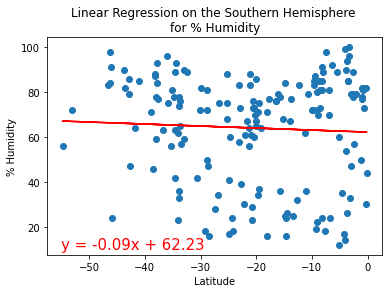

In [44]:
# Linear regression for Humidity on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', 
                       '% Humidity',(-55,10))

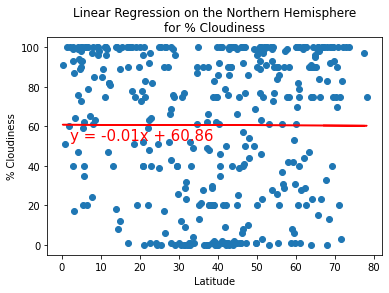

In [51]:
# Linear regression for cloudiness on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern '
                       'Hemisphere\nfor % Cloudiness','% Cloudiness',(2,53))

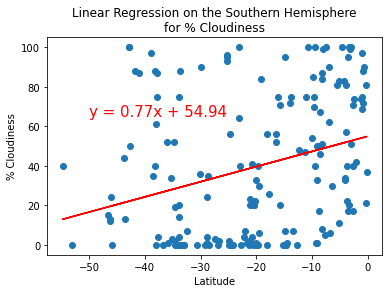

In [53]:
# Linear regression for cloudiness on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,'Linear Regression on the Southern'
                       ' Hemisphere\nfor % Cloudiness', '% Cloudiness',(-50,65))

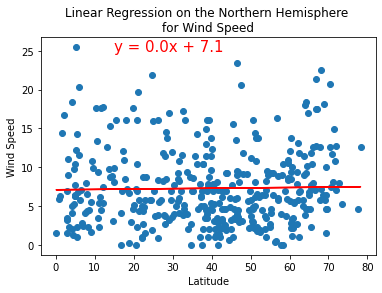

In [55]:
# Linear regression for wind speed on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values,'Linear Regression on the Northern'
                       ' Hemisphere \nfor Wind Speed', 'Wind Speed',(15,25))

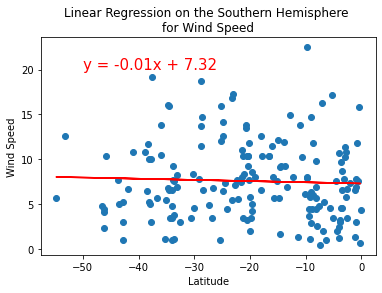

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values,'Linear Regression on the Southern'
                       ' Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,20))